In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import statistics 

In [32]:
all_data = pd.DataFrame(
    columns = ['voltage', 'current']
)

This is the slope (conductance):0.000341
This is the equation for the line of best fit:y = 0.000341x+2.75e-08
This is the slope (conductance):0.000342
This is the equation for the line of best fit:y = 0.000342x+1.11e-08
This is the slope (conductance):0.000343
This is the equation for the line of best fit:y = 0.000343x+3.41e-08
This is the slope (conductance):0.000343
This is the equation for the line of best fit:y = 0.000343x+3.1e-08
This is the slope (conductance):0.000343
This is the equation for the line of best fit:y = 0.000343x+3.45e-08


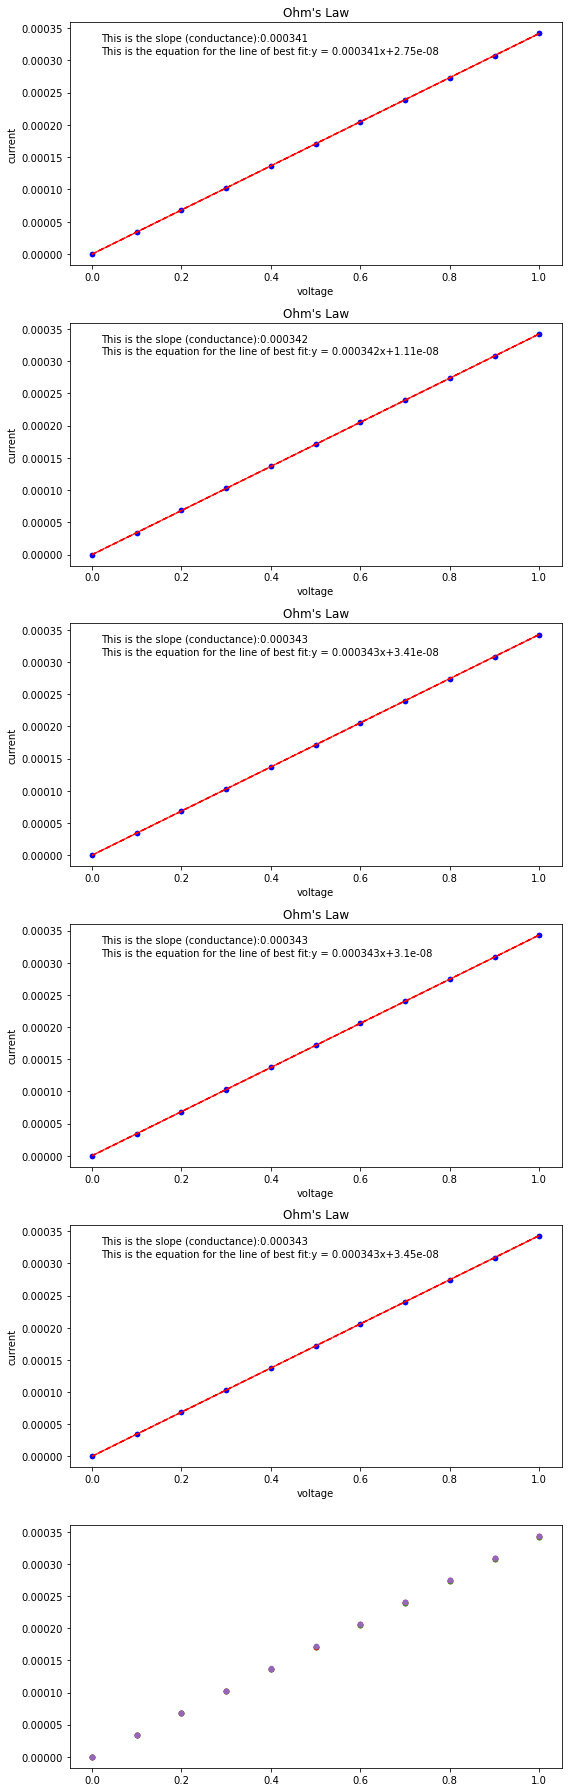

In [33]:
# PLOT WITH ALL OF THE DATA + TOTAL

fig, axs = plt.subplots(6, 1, figsize = (8, 25))  #add this line to get all 5 plots plotted
# plt.subplots(5, 1, figsize) // 5 = how many rows to organize the graphs // 1 = how many columns
# figsize = dimensions of how the graph is drawn

# ADDING PLOT WITH ALL DATA
# Original: fig, axs = plt.subplots(5, 1, figsize = (8, 25))
# adding one more subplot, changes 5 -> 6 subplots  
# fig, axs = plt.subplots(6, 1, figsize = (8, 25)) 

for x in np.arange(0,5):
    file_names = ["JS04-T004-0001.dat", "JS04-T004-0002.dat", "JS04-T004-0003.dat", "JS04-T004-0004.dat", "JS04-T004-0005.dat"]
    d1 = pd.read_csv(file_names[x], sep = '\s+', usecols = [0,1], names = ["voltage", "current"])

    all_data = pd.concat([all_data, d1]) 
    #this line adds the file's data to hte all data, dataframe
    #concat merges the data
    
    # print(d1) #Do this to check // this is all of the data from 1-5
  
    axs[x].scatter(d1['voltage'], d1['current'], s = 20, c = 'b') 
    m, b = np.polyfit(d1['voltage'], d1['current'], 1)
    axs[x].plot(d1['voltage'], m*d1['voltage'] + b, linestyle = '--', color = 'red')
 
    axs[x].set_xlabel("voltage")
    axs[x].set_ylabel("current")
    
    my_slope = 'This is the slope (conductance):'+ str(round(m,6))
    print(my_slope)

    my_line = 'This is the equation for the line of best fit:' + "y = " + str(round(m,6)) + "x+" + str(round(b,10))
    print(my_line)
        
    axs[x].set_title("Ohm's Law")
    axs[x].text(0.02, 0.00033, my_slope)    
    axs[x].text(0.02, 0.00031, my_line)
    
    fig.tight_layout()
    
    axs[5].scatter(d1['voltage'], d1['current'], s = 20) 
    #this line adds the last scatterplot // 5 is the 6th plot





In [34]:
all_data
#this is all over our data (original) combined 

,voltage,current
0,0.0,0.0
1,0.1,0.000034
2,0.2,0.000068
3,0.3,0.000102
4,0.4,0.000137
...,...,...
17,0.4,0.000137
18,0.3,0.000103
19,0.2,0.000069
20,0.1,0.000034


This is the slope (conductance):0.000342
This is the equation for the line of best fit:y = 0.000342x+2.76e-08
This is the total Conductivity 18.22177131829538


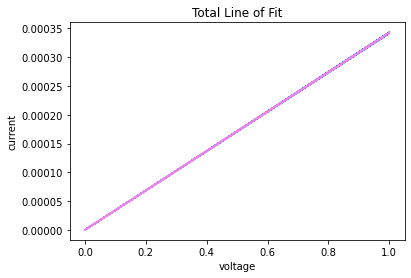

In [70]:
#TOTAL LINE OF FIT

plt.plot(all_data['voltage'], all_data['current'])

x = all_data['voltage'].tolist()
y = all_data['current'].tolist() 
#you have to standardize pd with polyfit. Use tolist to call all of your data to a list

m, b = np.polyfit(x, y, 1)
plt.plot(all_data['voltage'], m * all_data['voltage'] + b, linestyle = '--', color = 'violet')


plt.xlabel("voltage")
plt.ylabel("current")
plt.title("Total Line of Fit")


my_slope = 'This is the slope (conductance):'+ str(round(m,6))
print(my_slope)

my_line = 'This is the equation for the line of best fit:' + "y = " + str(round(m,6)) + "x+" + str(round(b,10))
print(my_line)


w = 37.5869E-3
l = 1.0E-3
t = 500.0E-9
A = t*w
G = m

C = (m)*(l/A)
total_conductivity = "This is the total Conductivity" + " " + str(C)
print(total_conductivity)